In [1]:
%matplotlib inline

# Import some generally important modules
import matplotlib.pyplot as plt, numpy as np, sys, os

# Import ProfileDB client
sys.path.append('/Users/basti/Work/Repositories/profiledb-python')
import profiledb

In [2]:
# Load ProfileDB.
pdb = profiledb.load('profiledb.json')
print('Loaded {} experiments...'.format(len(pdb.experiments)))
print
print 'Tags:\n', [str(tag) for tag in pdb.tags()]
print
print 'Configuration keys:\n', [str(key) for key in pdb.confkeys()]

Loaded 30 experiments...

Tags:
['attempt-4', 'attempt-1', 'attempt-3', 'attempt-2']

Configuration keys:
['plugins', 'inputSize', 'inputUrl']


In [3]:
def plotWordcount(suite):
    # Series key: employed plugins
    def keyfunc(exp): return str(exp.conf('plugins'))
    # x values: size of input file
    def xfunc(exp): return exp.conf('inputSize')
    # Select only measurements from the given suite.
    def selfunc(exp): return suite in exp.tags()

    # Create the series.
    actual = pdb.multipleseries(keyfunc,\
                                xfunc,\
                                yfunc = lambda exp: exp.measurement(['Execution'])['millis'] / 1000 + 1,\
                                selfunc = selfunc,\
                                groupfunc = profiledb.median)
    estlo = pdb.multipleseries(keyfunc,\
                               xfunc,\
                               yfunc = lambda exp: exp.measurement(['Estimate 1 (lower)'])['millis'] / 1000 + 1,\
                               selfunc = selfunc,\
                               groupfunc = min)
    esthi = pdb.multipleseries(keyfunc,\
                               xfunc,\
                               yfunc = lambda exp: exp.measurement(['Estimate 1 (upper)'])['millis'] / 1000 + 1,\
                               selfunc = selfunc,\
                               groupfunc = min)
    def geomean(a, b): return (a * b) ** .5
    estmean = pdb.multipleseries(keyfunc,\
                               xfunc,\
                               yfunc = lambda exp: geomean(exp.measurement(['Estimate 1 (lower)'])['millis'] / 1000., exp.measurement(['Estimate 1 (upper)'])['millis'] / 1000.) + 1,\
                               selfunc = selfunc,\
                               groupfunc = min)


    # Plot the series.
    plt.figure(figsize = (15, 7))
    plt.title('Wordcount execution time: estimated vs. actual')
    for series in actual:
        plt.plot(series[1].x, series[1].y, color = 'b', marker = 'x', label = str(series[0]) + ' (act.)')
    for series in estlo:
        plt.plot(series[1].x, series[1].y, color = 'b', linestyle = '--', label = str(series[0]) + ' (min. est.)')
    for series in esthi:
        plt.plot(series[1].x, series[1].y, color = 'b', linestyle = '--', label = str(series[0]) + ' (max. est.)')
    for series in estmean:
        plt.plot(series[1].x, series[1].y, color = 'b', linestyle = ':', label = str(series[0]) + ' (mean est.)')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('file size [MB]')
    plt.ylabel('execution time [s]')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

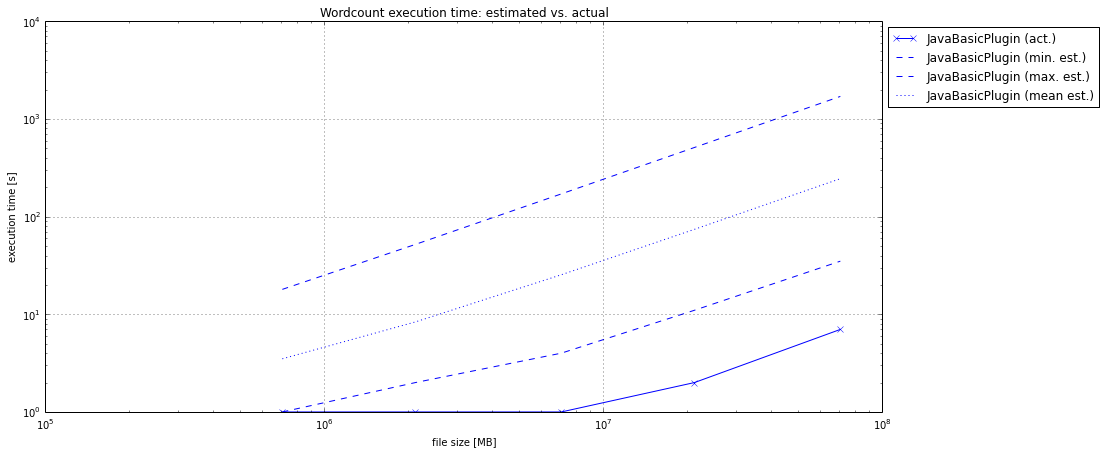

In [4]:
plotWordcount('attempt-1')

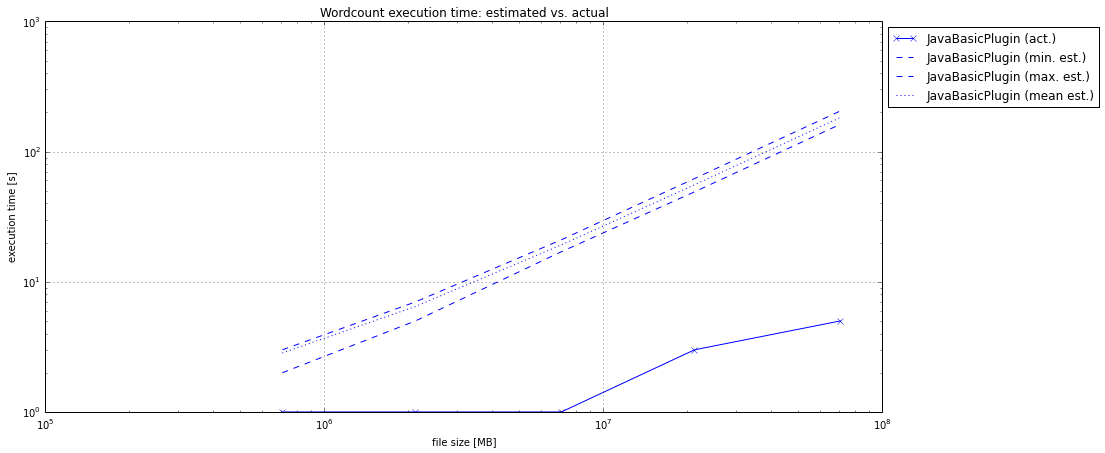

In [5]:
plotWordcount('attempt-2')

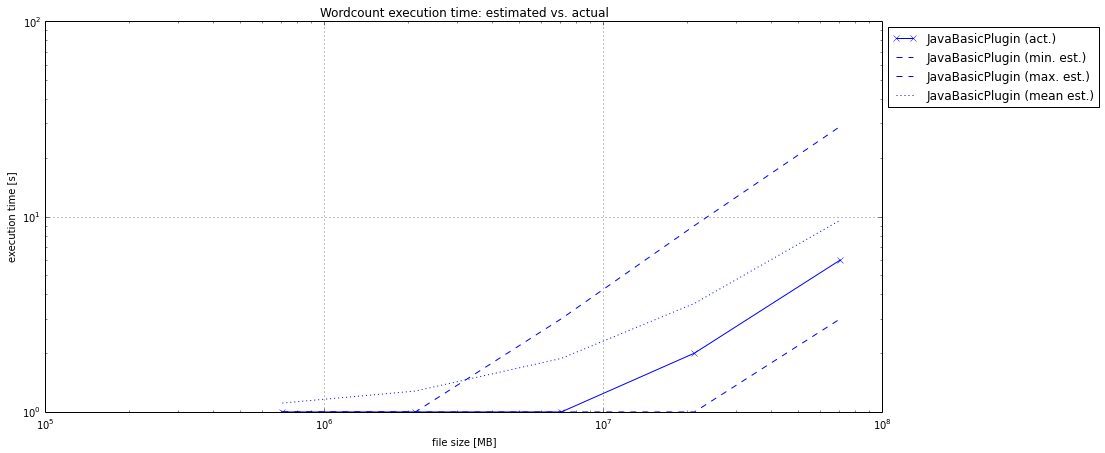

In [6]:
plotWordcount('attempt-3')